Импортируем все, что нам нужно:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Считываем датасет и отделяем целевую переменную от выборки:

In [2]:
data = pd.read_csv('housing.csv', header=None, delimiter='\s+')     # считываем csv файл
x = data[range(13)]                                                 # первые 13 значений для каждой строки это наши признаки
y = data[13]                                                        # самый последнее значение (столбец) для строки это целевая переменная

Сначала рассмотрим, как ведет себя модель при добавлении признаков. Будем оставлять только первые N столбцов (N будет начинаться с 1 и иметь шаг 2) и для каждого полученного случая измерять ошибку. В качестве метрик будем использовать MSE, MAE и R2:

In [3]:
mses = []                                              # массив ошибок MSE
maes = []                                              # массив ошибок MAE
r2s = []                                               # массив R2
num_features = list(range(1, 13, 2))                   # количество признаков (начинаем с 1, а потом добавляем 2)
lr = LinearRegression()                                # линейная регрессия от sklearn
for i in num_features:                                 # высчитываем MSE, MAE и R2 для каждого набора признаков
	x_left = x[range(i)]                               # выбираем признаки, по которым будут высчитываться ошибки и R2
	lr.fit(x_left, y)                                  # 'обучаем' линейную регрессию на наших признаках
	y_pred = lr.predict(x_left)                        # просим предсказать значение y, используя линейную регрессию
	mses.append(mean_squared_error(y, y_pred))         # считаем MSE
	maes.append(mean_absolute_error(y, y_pred))        # считаем MAE
	r2s.append(r2_score(y, y_pred))                    # считаем R2

Теперь построим графики зависимости ошибок от количества признаков:

Text(0, 0.5, 'MSE')

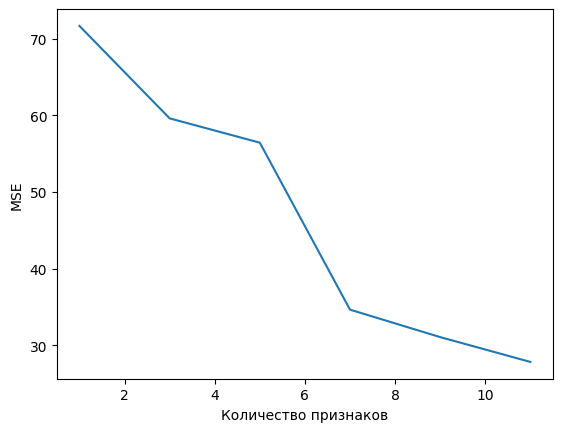

In [4]:
plt.plot(num_features, mses)          # строим график
plt.xlabel("Количество признаков")    # меняем название оси OX
plt.ylabel("MSE")                     # меняем название оси OY

Text(0, 0.5, 'MAE')

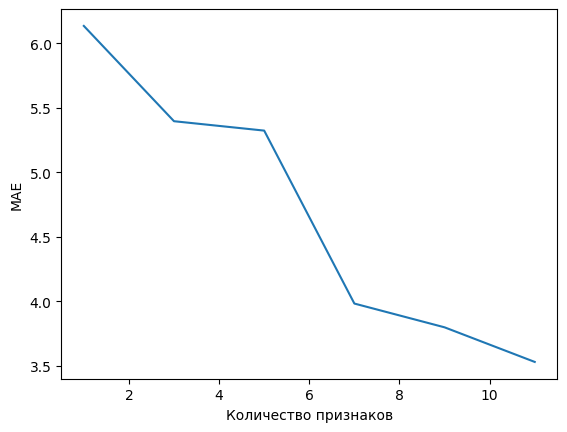

In [5]:
plt.plot(num_features, maes)         # строим график
plt.xlabel("Количество признаков")   # меняем название оси OX
plt.ylabel("MAE")                    # меняем название оси OY

Text(0, 0.5, 'R2')

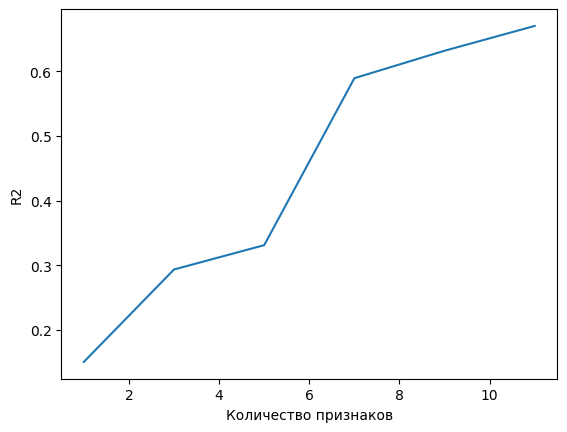

In [6]:
plt.plot(num_features, r2s)          # строим график
plt.xlabel("Количество признаков")   # меняем название оси OX
plt.ylabel("R2")                     # меняем название оси OY

Таким образом мы видим, что качество модели увеличивается с ростом признаков. В случае MSE и MAE ошибка уменьшается, а в случае R2 метрика растет.

Теперь будем исследовать зависимость от количества элементов в выборке. Будем оставлять только первые N элементов, где N будет меняться с шагом 75

In [7]:
mses = []                                                   # массив ошибок MSE
maes = []                                                   # массив ошибок MAE
r2s = []                                                    # массив R2
lr = LinearRegression()                                     # линйеная регрессия от sklearn
num_samples = list(range(1, x.shape[0], 75))                # количество элементов (начинаем с 1, а потом добавляем 75)
for samples in num_samples:                                 # высчитываем MAE, MSE и R2 для каждого набора элементов
	x_left = x[:samples]                                    # выбираем первые N строк для x
	y_left = y[:samples]                                    # выбираем первые N строк для y
	lr.fit(x_left, y_left)                                  # 'обучаем' линейную регрессию
	y_pred = lr.predict(x_left)                             # просим предсказать значение y для переданного набора строк
	mses.append(mean_squared_error(y_left, y_pred))         # считаем MSE 
	maes.append(mean_absolute_error(y_left, y_pred))        # считаем MAE
	r2s.append(r2_score(y_left, y_pred))                    # считаем R2

Теперь построим графики зависимости ошибок от количества данных:

Text(0, 0.5, 'MSE')

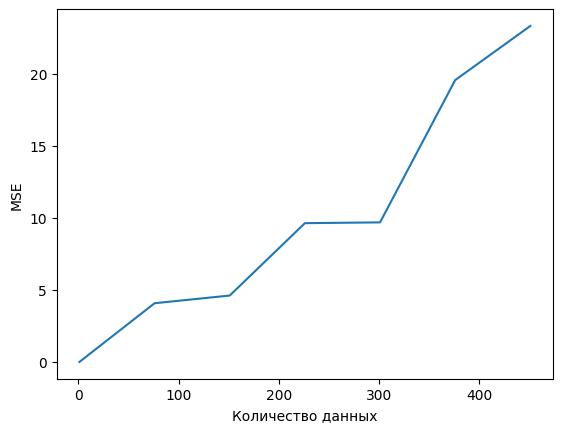

In [8]:
plt.plot(num_samples, mses)       # строим график
plt.xlabel("Количество данных")   # меняем название оси OX
plt.ylabel("MSE")                 # меняем название оси OY

Text(0, 0.5, 'MAE')

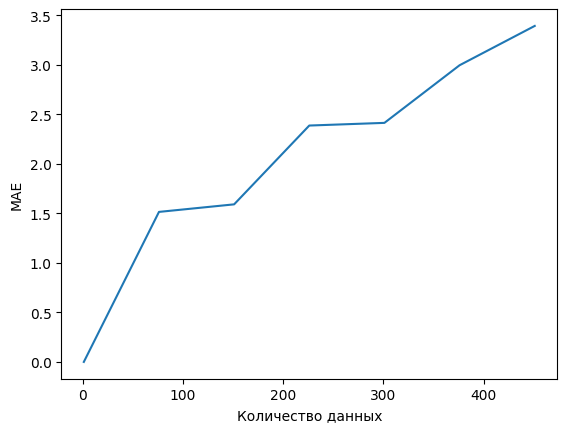

In [9]:
plt.plot(num_samples, maes)      # строим график
plt.xlabel("Количество данных")  # меняем название оси OX
plt.ylabel("MAE")                # меняем название оси OY

Text(0, 0.5, 'R2')

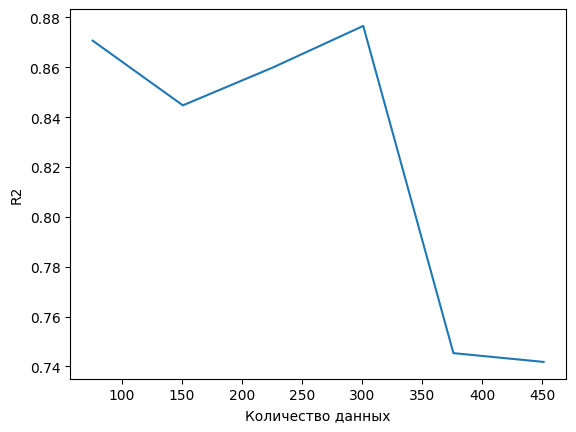

In [10]:
plt.plot(num_samples, r2s)        # строим график
plt.xlabel("Количество данных")   # меняем название оси OX
plt.ylabel("R2")                  # меняем название оси OY

Получается, что при увеличении числа элементов качество модели постепенно ухудшается. Это связано с тем, что при увеличении количества элементов для модели сложнее подобрать линейную зависимость, которая бы хорошо приближала сразу все точки. Также из полученных данных можно заметить, что в промежутке (примерно) 330 - 380 находятся такие элементы, которые сильно отличаются от тех, которые предсказывает данная линейная регрессия (это хорошо видно на графике MSE и R2) 

Теперь оставим только первые два признака в выборке и обучим на них линейную регрессию. Отобразим данные и полученную плоскость решения на трехмерном рисунке:

Text(0.5, 0, 'Целевая переменная')

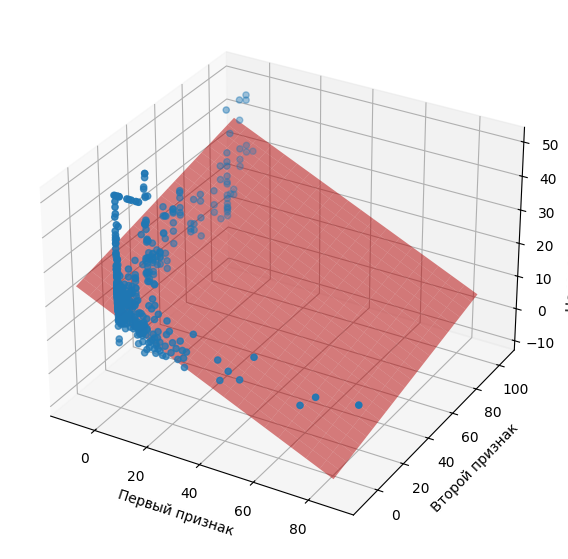

In [11]:
x_left = x[range(2)]                                                                      # выбираем данные из первых двух признаков
lr.fit(x_left, y)                                                                         # 'обучаем' модель на этих данных
fig = plt.figure(figsize=(12,7))                                                          # обозначаем размеры графика
ax = fig.add_subplot(111, projection='3d')                                                # добавляем график
ax.scatter(x_left[0], x_left[1], y)                                                       # обозначаем данные из датасета для графика
x_plot, y_plot = np.meshgrid(np.arange(-10, 90, 5), np.arange(-10, 110, 5))               # выбираем область значений для каждого признака
z_plot = lr.predict(np.stack((x_plot, y_plot), axis=2).reshape(480,2)).reshape(24,20)     # просим предсказать данные из выбранной области значений
ax.plot_surface(x_plot, y_plot, z_plot, color='red', alpha=0.5)                           # строим поверхность, которая является нашей линейной регрессией
ax.set_xlabel('Первый признак')                                                           # меняем название оси OX
ax.set_ylabel('Второй признак')                                                           # меняем название оси OY
ax.set_zlabel('Целевая переменная')                                                       # меняем название оси OZ